In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats
plt.style.use('seaborn')

# Regressão

Problemas de aprendizagem supervisionada tem a seguinte definição (extraída do livro *Inteligência Artificial* de Stuart Russel e Peter Norvig):<br><br>

<center> Dado um <strong>conjunto de treinamento</strong> de $N$ pares de exemplos de entrada e saída <br> $(x_{1}, y_{1}), (x_{2}, y_{2}), ... (x_{N}, y_{N}),$ <br> onde cada $y_{j}$ foi gerado por uma função desconhecida $y=f(x)$,<br> descobrir uma função $h$ que se aproxime da função verdadeira $f$.</center>

<br>

Problemas de **regressão** tem a característica de possuir uma *target*  que é um *"número"*, uma quantidade (e.g. ticket médio, renda, temperatura, etc). A fronteira entre problemas de **classificação** e **regressão** é, as vezes, um pouco mais nebulosa e cinzenta (imagine uma *target* discreta numérica e ordinal, com vários valores distintos - a intensidade de pixels em uma imagem, por exemplo) - veja este [artigo](https://www.cs.waikato.ac.nz/~eibe/pubs/ordinal_tech_report.pdf).

# Visão geral

A regressão linear é um modelo paramétrico dado pela seguinte equação, ou seja, estamos limitando o espaço de hipóteses $\mathscr{H}$ à funções da seguinte família de equações: <br><br>

<center>$\large \hat{y}_i = h_{\beta}(x) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{n2} + \dots + \beta_d x_{nd}$</center>

onde $n$ é a quantidade de observações e $d$ é a quantidade de variáveis preditoras (*features*). Em sua forma matricial, é dado por, onde forçamos $x_{i0} = 1$: <br><br>

<center>$\large \hat{y} = \text{X}\cdot\mathbf{\beta}$</center>

Explicitamente, temos:

<table cellpadding="0" cellspacing="0" width="60%" border="0" style="background-color:white;">
  <tr>
    <th width="30%"><center>$\large \hat{y} = \begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n} \end{pmatrix}$</center></th>
    <th width="40%"><center>$\large X = \begin{pmatrix} 1 & x_{12} & x_{13} & \cdots &  x_{1d} \\ 1 & x_{22} & x_{23} & \cdots & x_{2d}  \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n2} & x_{n3} & \cdots & x_{nd} \end{pmatrix}$</center></th>
    <th width="30%"><center>$\large\beta = \begin{pmatrix} \beta_{0} \\ \beta_{1} \\ \vdots \\ \beta_{d} \end{pmatrix}$</center></th>
  </tr>
</table>

note que $\hat{y}$ é um vetor de tamanho $n$, a quantidade de observações, a matrix $X$ tem dimensões $n \times (d+1)$ e, por fim, $\beta$ é um vetor de tamanho $d+1$, quantidade de variáveis independentes mais o viés.

Antes de prosseguirmos, fazemos uma distinção fundamental entre $\hat{y}$, ou $h_{\beta}(x)$, e $y$, ou $f(x)$. Enquanto o $\hat{y}$ **estimado** é dado pela seguinte equação:

<br>
<center>$\large \hat{y} = \text{X}\cdot\mathbf{\beta}$</center>

Supomos que a relação verdadeira entre as variáveis independentes $\vec{x}$ e a dependete $y$, algo que não é completamente determinístico, mas sim, probabilístico, siga a seguinte equação:

<br>
<center>$\large y = \text{X}\cdot\mathbf{\beta} + \epsilon$</center>

ou seja,

<br>
<center>$\large \epsilon = y - \hat{y}$</center>

aonde $\epsilon$ é que chamamos de **resíduos**. A regressão linear irá ter uma boa performance quando algumas *suposições* sobre estes resíduos forem satisfeitas. Isso indica que a verdadeira função $f(x)$ está dentro dentro do espaço de hipóteses $\mathscr{H}$, ou seja, conseguiremos econtrar um $h_{\beta}(x)$ próximo do ideal. Com relação às *suposições*, temos:

* Para qualquer conjunto de valores de $\vec{x}$ a distribuição dos resíduos é normal.
* Resíduos são independentes e identicamente distribuídos (i.i.d);
* Distribuição dos resíduos tem média nula:
    - Para uma regressão linear simples isso implica $E(y|X) = \hat{y}$;
* Distribuição dos resíduos tem desvio padrão $\sigma$ constante (Homocedasticidade);

# Soluções

Resolver o problema da regressão linear significa encontrar os coeficientes $\beta$ que gerem uma reta que melhor se ajuste aos dados. Esse **melhor ajuste** é encontrado minimizando uma **função de custo** - a soma dos quadrados dos resíduos:

<br>
<center>$\large J(\beta) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_{i} - y_{i})^{2}$ </center>

Encontrar esse mínimo e, dessa forma, encontrar os coeficientes $\beta$ é algo que pode ser feito utilizando diferentes métodos como veremos a seguir. *Disclaimer*: computar estes coeficientes é o que chamamos de **aprendizado**.

## Solução analítica

A regressão linear, diferente de vários outros tipos de regressão, possui uma solução analítica - chamada de equação normal:

<br>
<center>$\large \hat{\beta}= (\text{X}^{T}\text{X})^{-1} \cdot (\text{X}^{T}y)$ </center>

Como chegar nesta solução está fora do escopo da aula, mas é algo simples, segue este [link](https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5).

In [2]:
# Gerando um pares ordenados (x, y) que seguem as suposições acima
# Exemplo: regressão linear simples

ARRAY_LENGTH = 200
MIN_INTERVAL = 0
MAX_INTERVAL = 10

RESIDUAL_STD = 3.5
BETA_1 = 3
BETA_0 = 6

# Definindo vetor Beta
real_beta = np.array([BETA_0, BETA_1]).T

# Definindo vetor x
x_T = np.linspace(MIN_INTERVAL, MAX_INTERVAL, ARRAY_LENGTH)

# Criando um vetor constante para compor a matriz X
const_T = np.ones(ARRAY_LENGTH)

# Definindo a matriz X
X = np.array([const_T, x_T]).T

# Média nula e desvio padrão constante
residuals = RESIDUAL_STD*np.random.randn(ARRAY_LENGTH) 

# Equação final
y = X.dot(real_beta) + residuals

In [3]:
# Resolvendo a equação analíticamente, temos:
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

# Obtendo o Beta estimado
y_hat = X.dot(beta_hat)

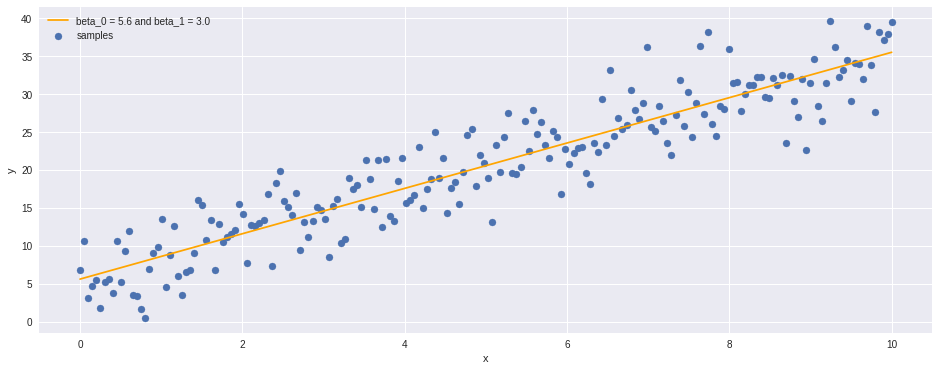

In [4]:
fig = plt.figure(figsize=(16,6))
_ = plt.scatter(X[:,1], y)
_ = plt.plot(X[:,1], y_hat, color='orange')
_ = plt.legend(['beta_0 = {} and beta_1 = {}'.format(round(beta_hat[0],2),round(beta_hat[1]),2), 'samples'],
           loc='upper left',
           shadow=True)
_ = plt.xlabel('x')
_ = plt.ylabel('y')

Mean of residues: 0.0
Standard deviation of residues: 3.504
Slope: 1.009
Intercept: 0.0
R_squared: 0.998


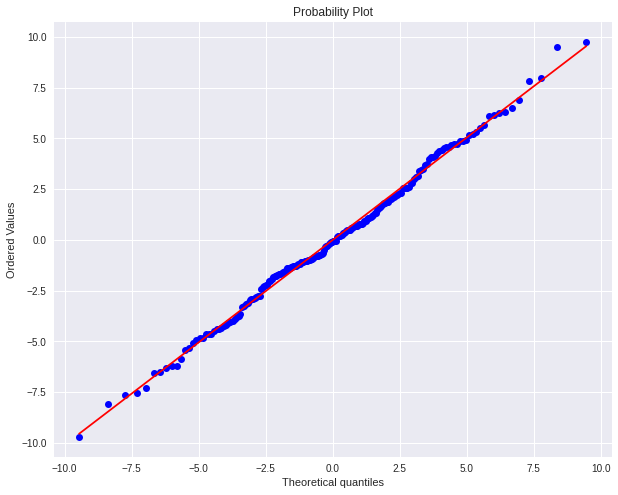

In [5]:
mean = (y - y_hat).mean()
std = (y - y_hat).std()

print("Mean of residues: {}".format(round(mean,4)))
print("Standard deviation of residues: {}".format(round(std,3)))

fig = plt.figure(figsize=(10,8))

results = stats.probplot(y - y_hat, dist="norm", sparams=(mean, std), plot=pylab)
print("Slope: "+str(round(results[1][0],3)))
print("Intercept: "+str(round(results[1][1],3)))
print("R_squared: "+str(round(results[1][2],3)))
pylab.show()

## Gradiente descendente

O gradiente descendente, por sua vez, é um método genérico de otimização. É possível aplicá-lo para encontrar a solução de diversos problemas diferentes. Isso inclui a regressão linear. É aplicada para encontrar o vetor $\hat{\beta}$ que minimiza a função de custo $J(\beta)$.

A ideia, em termos gerais, é inicializar o vetor $\hat{\beta}$ de maneira aleatória, e ir dando pequenos passos iterativamente na direção em que o gradiente indica que haverá redução no valor de $J(\beta)$ - o tamanho do passo é chamado de *learning rate* $\eta$. Quando se repete esses passos literalmente descemos a "colina" dada pela superfície $J(\beta)$ até encontrar o ponto em que não há direção em que observamos uma redução na função de custo. O vetor $\hat{\beta}$ encontrado é o mínimo e deve ser muito próximo a solução analítica - critério de parada.

No caso da regressão linear ainda há o bônus de que $J(\beta)$ é convexa, ou seja, não existem mínimos locais!

Resta calcular o gradiente $\nabla_{\beta}J(\beta)$. Calcular as derivadas parciais $J(\beta)$  em termos dos $\beta_{i}$, os elementos do gradiente, é algo muito simples para a função de custo da regressão linear, vale o exercício. Segue o resultado:
<br><br>
<center>$\large \frac{\partial}{\partial\beta_{i}}J(\beta)=\frac{2}{n}\sum^{n}_{j=1}(\beta^{T}\cdot x^{(j)} - y^{(j)}) x^{(j)}_{i}$</center>

O cálculo de $\nabla_{\beta}J(\beta)$ pode ser feito em termos de uma única equação matricial:
<br><br>
<center>$\large \nabla_{\beta}J(\beta)=\begin{pmatrix} \frac{\partial}{\partial\beta_{0}}J(\beta) \\ \frac{\partial}{\partial\beta_{1}}J(\beta) \\ \vdots \\ \frac{\partial}{\partial\beta_{d}}J(\beta) \end{pmatrix}=\frac{2}{n}X^{T}\cdot(X\cdot\beta-y)$</center>

A atualização do vetor $\beta$ é dado pela seguinte equação:

<br>
<center>$\large \beta^{(\text{proximo})} = \beta - \eta \nabla_{\beta}J(\beta)$</center>


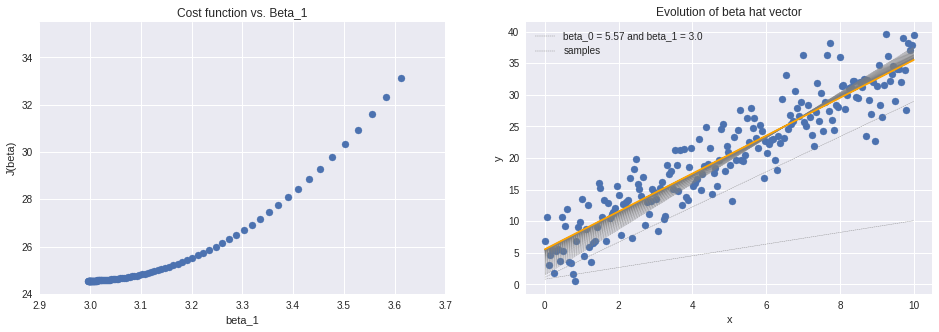

In [16]:
# Inicialização aleatória
beta_gd = np.random.random(size=2)

# Inicialização dos parâmetros do gradiente descendente
eta = 0.01
n_iterations = 1000
n = y.size

def cost(y, X, beta, n):
    y_hat = X.dot(beta)
    return 2/n * np.square(y - y_hat).sum()

cost_function_vals = [cost(y, X, beta_gd, n)]
beta_evolution = [beta_gd]

for iteration in range(n_iterations):
    gradients = 2/n * X.T.dot(X.dot(beta_gd) - y)
    beta_gd = beta_gd - eta * gradients
    if iteration % 10 == 0:
        cost_function_vals.append(cost(y, X, beta_gd, n))
        beta_evolution.append(beta_gd)

y_hat_gd = X.dot(beta_gd)

fig, ax = plt.subplots(1,2, figsize=(16,5))
_ = ax[0].scatter(list(map(lambda x: x[1], beta_evolution)), cost_function_vals)
_ = ax[0].set_xlim([2.9, 3.7])
_ = ax[0].set_ylim([24, 35.5])
_ = ax[0].set_xlabel('beta_1')
_ = ax[0].set_ylabel('J(beta)')
_ = ax[0].set_title('Cost function vs. Beta_1')

_ = ax[1].scatter(X[:,1], y)
for beta_gd_ev in beta_evolution:
    y_hat_gd_ev = X.dot(beta_gd_ev)
    _ = ax[1].plot(X[:,1], y_hat_gd_ev, color='gray', linestyle='--', linewidth=0.4)
    
_ = ax[1].plot(X[:,1], y_hat_gd, color='orange')
_ = ax[1].legend(['beta_0 = {} and beta_1 = {}'.format(round(beta_gd[0],2),round(beta_gd[1]),2), 'samples'],
           loc='upper left',
           shadow=True)
_ = ax[1].set_xlabel('x')
_ = ax[1].set_ylabel('y')
_ = ax[1].set_title('Evolution of beta hat vector')